<a href="https://colab.research.google.com/github/sidjohal/ML_implemented/blob/main/1.%20overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Look at the big picture

##### Design consideration in problem framing
    - Supervised, Unsupervised, Reinforced Learning
    - Classification, Regression, Other
    - Single, Multiple outputs
    - Continuous Learning, Periodic Updates
    - Batch, Online

##### Selection of performance measure
    - Regression: MSE, MAE
    - Classification: Precision, Recall, F1-Score, Accuracy

##### Check the assumptions
    - Review with domain experts

# Step 2: Data
    lec 1.1

### Importing data

In [ ]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Data statistics

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

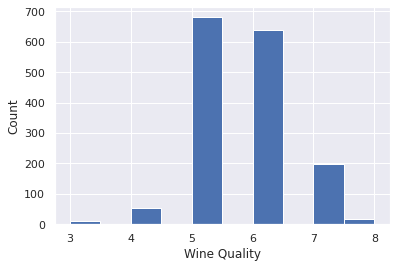

In [ ]:
sns.set()
data['quality'].hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

Text(0.5, 1.0, 'csi wine data')

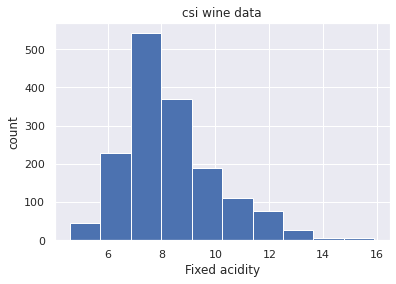

In [ ]:
sns.set()

data["fixed acidity"].hist()
plt.xlabel("Fixed acidity")
plt.ylabel("count")
plt.title("csi wine data")

Text(0, 0.5, 'Count')

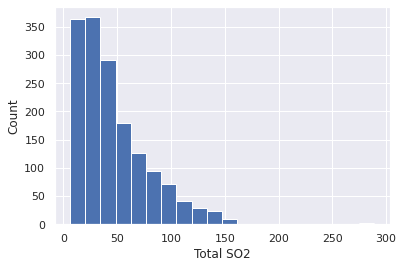

In [ ]:
data['total sulfur dioxide'].hist(bins=20)
plt.xlabel('Total SO2')
plt.ylabel('Count')

In [ ]:
features = data.columns[:-1].values
label = data.columns[-1]
         
print ("Features:", features)
print ("Label:", label)

Features: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: quality


## Data preprocessing

### data splitting funciton from scratch

In [ ]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    
    test_set_size = int(len(data) * test_ratio)
    
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    train_data, test_data = data.iloc[train_indices], data.iloc[test_indices]
    
    return train_data, test_data

In [ ]:
train_data, test_data = split_train_test(data, 0.2)

### data splitting using sklearn

####  Random sampling

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size=0.2, random_state=42)

In [ ]:
random_dist = test_data["quality"].value_counts() / len(test_data)

In [ ]:
total_dist = data['quality'].value_counts() / len(data)

In [ ]:
dist_comparison_random = pd.DataFrame({'overall': total_dist, 'random': random_dist})

In [ ]:
dist_comparison_random['diff_random'] = (total_dist - random_dist)

In [ ]:
dist_comparison_random['diff_pc_random'] = 100 * (total_dist - random_dist)/total_dist

In [ ]:
dist_comparison_random

,overall,random,diff_random,diff_pc_random
3,0.006254,0.003125,0.003129,50.031250
4,0.033146,0.031250,0.001896,5.719340
5,0.425891,0.406250,0.019641,4.611784
6,0.398999,0.412500,-0.013501,-3.383621
7,0.124453,0.131250,-0.006797,-5.461683
8,0.011257,0.015625,-0.004368,-38.802083


#### Stratified sampling (as per distribution)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set) 

In [ ]:
total_dist = data['quality'].value_counts() / len(data)

In [ ]:
dist_comparison = pd.DataFrame({'overall': total_dist, 'stratified': strat_dist})

In [ ]:
dist_comparison['diff_stratified'] = (total_dist - strat_dist)

In [ ]:
dist_comparison['diff_pc_stratified'] = 100 * (total_dist - strat_dist)/total_dist

In [ ]:
dist_comparison

,overall,stratified,diff_stratified,diff_pc_stratified
5,0.425891,0.425000,0.000891,0.209251
6,0.398999,0.400000,-0.001001,-0.250784
7,0.124453,0.125000,-0.000547,-0.439698
4,0.033146,0.034375,-0.001229,-3.708726
8,0.011257,0.009375,0.001882,16.718750
3,0.006254,0.006250,0.000004,0.062500


### Stratified vs random sampling

In [ ]:
dist_comparison.insert(1, 'random', dist_comparison_random['random'])
dist_comparison.insert(3, 'diff_random', dist_comparison_random['diff_random'])
dist_comparison.insert(6, 'diff_pc_random', dist_comparison_random['diff_pc_random'])

In [ ]:
dist_comparison

,overall,random,stratified,diff_random,diff_stratified,diff_pc_stratified,diff_pc_random
5,0.425891,0.406250,0.425000,0.019641,0.000891,0.209251,4.611784
6,0.398999,0.412500,0.400000,-0.013501,-0.001001,-0.250784,-3.383621
7,0.124453,0.131250,0.125000,-0.006797,-0.000547,-0.439698,-5.461683
4,0.033146,0.031250,0.034375,0.001896,-0.001229,-3.708726,5.719340
8,0.011257,0.015625,0.009375,-0.004368,0.001882,16.718750,-38.802083
3,0.006254,0.003125,0.006250,0.003129,0.000004,0.062500,50.031250


# Step 3: Data visualization
    lec 1.2

### Comparing random and stratified sampling.

In [ ]:
dist_comparison

,overall,random,stratified,diff_random,diff_stratified,diff_pc_stratified,diff_pc_random
5,0.425891,0.406250,0.425000,0.019641,0.000891,0.209251,4.611784
6,0.398999,0.412500,0.400000,-0.013501,-0.001001,-0.250784,-3.383621
7,0.124453,0.131250,0.125000,-0.006797,-0.000547,-0.439698,-5.461683
4,0.033146,0.031250,0.034375,0.001896,-0.001229,-3.708726,5.719340
8,0.011257,0.015625,0.009375,-0.004368,0.001882,16.718750,-38.802083
3,0.006254,0.003125,0.006250,0.003129,0.000004,0.062500,50.031250


### Data plotting

` Since the dataset used is small, we use it as the "exploration set" instead of creating a new one`

In [ ]:
exploration_set = strat_train_set.copy()

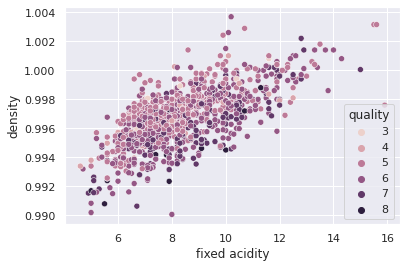

In [ ]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

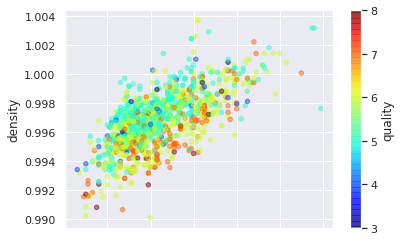

In [ ]:
exploration_set.plot(kind="scatter", x="fixed acidity", y="density", alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

### Correlation between features
`correlation is useful for linear relationships;
for non-linear rel. we use rank correlation`

In [ ]:
exploration_set = strat_train_set.copy()

In [ ]:
corr_matrix = exploration_set.corr()

In [ ]:
# correlation of select feature (including quality) with other features
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

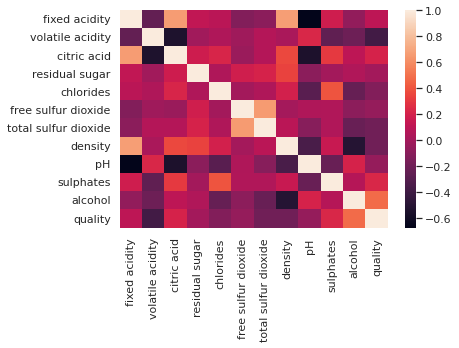

In [ ]:
sns.heatmap(corr_matrix)

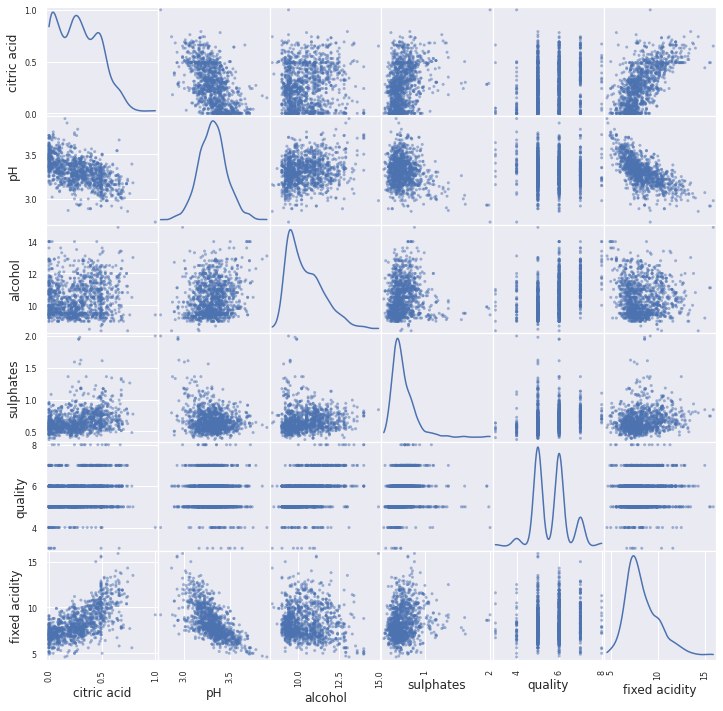

In [ ]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality', 'fixed acidity']
#semi-colon at the end of the below statement is used to ignore the text in the output.
scatter_matrix(exploration_set[attribute_list], figsize=(12, 12), diagonal='kde', alpha=0.5);

# Step 4: Prepare data for ML algorithm
    lec 1.3

Preprocessing is required to make data usable for a model;
* Data may have missing values due to errors in data collection
* Different features may be on different scales and thus variance in weights may be high
* Current distribution may not be fit for learning


Thus, steps in data preprocessing are:
* Separate features and labels
* Feature imputation - handling missing values
* Feature scaling
* Feature transformation

#### Separate features and labels

In [ ]:
wine_features = strat_train_set.drop("quality", axis=1)
wine_labels = strat_train_set['quality'].copy()
wine_labels

1542    6
1558    5
344     6
924     5
971     6
       ..
1056    7
1394    5
337     5
539     5
1083    6
Name: quality, Length: 1279, dtype: int64

In [ ]:
wine_features.isna().sum() # you may use dropna() or drop() from sklearn to drop rows containing missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

### Feature imputation

* Deleting rows containing empty values maybe costly; Thus we impute missing data
* Imputation can be done using median, mean, etc or neighboring values


In [ ]:
#Forcing all rows with free sulfur dioxide less than 5 to NA, and we'll impute those values to median later.

strat_train_set.loc[strat_train_set['free sulfur dioxide'] < 5, 'free sulfur dioxide'] = None
strat_train_set.shape

(1279, 12)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(wine_features)
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [ ]:
# we can verify values from the imputer statistics from median method
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [ ]:
type(wine_features)
wine_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90


In [ ]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [ ]:
tr_features = imputer.transform(wine_features)

In [ ]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

In [ ]:
wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


In [ ]:
wine_features_tr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.306489,0.528073,0.273878,2.543589,0.088934,16.127834,47.280688,0.996735,3.308585,0.663675,10.424446
std,1.695325,0.177710,0.194902,1.375697,0.050981,10.473562,33.334786,0.001852,0.151599,0.178360,1.065672
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000
25%,7.100000,0.395000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,39.000000,0.996750,3.310000,0.620000,10.200000
75%,9.300000,0.635000,0.430000,2.600000,0.091000,22.000000,64.000000,0.997800,3.400000,0.740000,11.100000
max,15.900000,1.580000,1.000000,15.400000,0.611000,68.000000,289.000000,1.003690,3.900000,2.000000,14.900000


### Encoding for categorical features

In [ ]:
data = pd.DataFrame([['One', 'Two', 'Three'],['January', 'February', 'March'],['January', 'Two', 'Three','Four'],['One', 'February', 'March', 'April']])
data

,0,1,2,3
0,One,Two,Three,None
1,January,February,March,None
2,January,Two,Three,Four
3,One,February,March,April


#### OrdinalEncoder

Features can be ordinally encoded and accessed through categories_instance
* ML algo would assume 2 nearby values are closed than distinct ones

Then we can use OnHotEncoder
* When the data is one-hot encoded, there're as many columns in the encoded form as there are unique values in the data (including None)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
ord = ord_encoder.fit_transform(data)
print(ord)

[[1. 1. 1. 2.]
 [0. 0. 0. 2.]
 [0. 1. 1. 1.]
 [1. 0. 0. 0.]]


In [ ]:
ord_encoder.categories_

[array(['January', 'One'], dtype=object),
 array(['February', 'Two'], dtype=object),
 array(['March', 'Three'], dtype=object),
 array(['April', 'Four', None], dtype=object)]

#### OneHotEncoder  for categorical features

In [ ]:
# When the data is one-hot encoded, there're as many columns in the encoded form as there are unique values in the data (including None)
data1 = pd.DataFrame([['One', 'Two', 'Three'],['January', 'February', 'March'],['January', 'Two', 'Three','Four'],['One', 'February', 'March', 'April']])
data1

,0,1,2,3
0,One,Two,Three,None
1,January,February,March,None
2,January,Two,Three,Four
3,One,February,March,April


In [ ]:
#Let's one-hot encode this.
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False) # By default, OneHotEncoder produces a sparse matrix.

In [ ]:
one_hot = cat_encoder.fit_transform(data1)
print(one_hot)

[[0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0.]]


In [ ]:
cat_encoder.categories_

[array(['January', 'One'], dtype=object),
 array(['February', 'Two'], dtype=object),
 array(['March', 'Three'], dtype=object),
 array(['April', 'Four', None], dtype=object)]

#### OneHotEncoder for mixed (numerical and categorical) features

In [ ]:
# Add a new column called place_of_manufacturing to the wine_features_tr; there must be 1279 rows.
d1 = pd.DataFrame(['Delhi', 'Mumbai','Calcutta','Chennai', 'Cochin', 'Bangalore'] * 200)
d2 = pd.DataFrame(['Trivandrum'] * 79)
df = pd.concat([d1, d2])
df = df.iloc[np.random.permutation(len(df))]
df.reset_index(inplace = True)

In [ ]:
wine_features_modified = wine_features_tr.copy()
wine_features_modified['place_of_manufacturing'] = df.loc[:,0]
wine_features_modified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,place_of_manufacturing
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,Chennai
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,Cochin
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,Chennai
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,Chennai
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10,Trivandrum
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20,Chennai
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30,Bangalore
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20,Cochin


In [ ]:
# Use ColumnTransformer to transform mixed features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_attribs = list(wine_features)
cat_attribs = ["place_of_manufacturing"]

In [ ]:
# t = [("num", MinMaxScaler(), num_attribs), ("cat", OneHotEncoder(sparse=False), cat_attribs)]
t = [("num", StandardScaler(), num_attribs), ("cat", OneHotEncoder(sparse=False), cat_attribs)] # scale as Standard normal distribution
full_pipeline = ColumnTransformer(transformers=t)
wine_features_modified_encoded = full_pipeline.fit_transform(wine_features_modified)

In [ ]:
wine_features_modified_encoded

array([[-0.94797009,  1.84038456, -1.30310213, ...,  0.        ,
         0.        ,  0.        ],
       [-0.8299525 ,  0.57378326,  0.28806218, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.12048734,  0.23602292,  1.16063616, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.29887333, -0.55208456,  0.2367343 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.70742577, -0.15803082,  2.3925053 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23220584, -0.60837795,  0.90399675, ...,  0.        ,
         0.        ,  0.        ]])

### Transformation pipelines (feature imputing + feature scaling)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),])
wine_features_tr_pipeline = transform_pipeline.fit_transform(wine_features)

In [ ]:
wine_features_tr_pipeline

array([[-0.94797009,  1.84038456, -1.30310213, ..., -0.05665069,
        -0.58149257,  0.30561112],
       [-0.8299525 ,  0.57378326,  0.28806218, ..., -0.58456494,
        -0.58149257, -0.86781667],
       [ 2.12048734,  0.23602292,  1.16063616, ..., -1.24445776,
         0.65244695,  0.258674  ],
       ...,
       [-0.29887333, -0.55208456,  0.2367343 , ...,  0.00933859,
        -0.13278729, -0.11682289],
       [ 1.70742577, -0.15803082,  2.3925053 , ..., -0.58456494,
        -0.24496361,  0.72804512],
       [ 0.23220584, -0.60837795,  0.90399675, ...,  0.14131716,
         0.59635879,  1.4790389 ]])

# Step 5: Select and train ML model

#### Fit Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [ ]:
# Evaluate performance on training set
from sklearn.metrics import mean_squared_error
quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.42065710600602785

In [ ]:
# Evaluating performance on test set
wine_features_test = strat_test_set.drop("quality", axis=1)
wine_labels_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


12.896152700622249

#### Fit DecisionTreeRegressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [ ]:
# Evaluate performance on training set
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [ ]:
# Evaluate performance on test set
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


2.65625

Text(0, 0.5, 'Predicted quality')

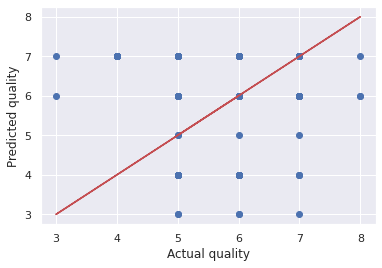

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

#### Fit RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

RandomForestRegressor()

In [ ]:
# Evaluate performance on training set
quality_predictions = forest_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0473697419859265

In [ ]:
# Evaluate performance on test set
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.9560150000000001

Text(0, 0.5, 'Predicted quality')

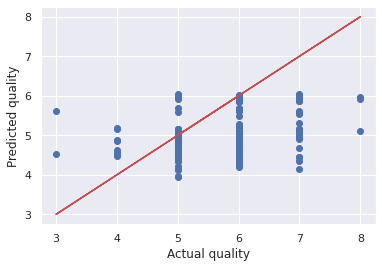

In [ ]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

### Cross-validation

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10) #cv = numbers of folds
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.431639217212196
Standard deviation: 0.08356359730413902


In [ ]:
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores: [0.59375    0.7421875  0.59375    0.46875    0.4296875  0.5703125
 0.6171875  0.765625   0.8671875  0.98425197]
Mean: 0.6632689468503937
Standard deviation: 0.16557350568548737


In [ ]:
scores = cross_val_score(forest_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores: [0.36085156 0.42883281 0.30084844 0.32678594 0.21999141 0.28885313
 0.27150391 0.38917813 0.43847188 0.44352756]
Mean: 0.34688447465551187
Standard deviation: 0.07355439245894307


# Step 6: Finetune your model

##### Grid search for RandomForest model

In [ ]:
from sklearn.model_selection import GridSearchCV
# RandomForest has two hyper-parameters: n_estimators (number of classifiers) and max_features (number of features)
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) # refit has a default value of True
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.4555232162309368 {'max_features': 2, 'n_estimators': 3}
0.3890544730392157 {'max_features': 2, 'n_estimators': 10}
0.3626417687908497 {'max_features': 2, 'n_estimators': 30}
0.4988422521786492 {'max_features': 4, 'n_estimators': 3}
0.3928750919117647 {'max_features': 4, 'n_estimators': 10}
0.3575461669389978 {'max_features': 4, 'n_estimators': 30}
0.5151256127450979 {'max_features': 6, 'n_estimators': 3}
0.38185600490196075 {'max_features': 6, 'n_estimators': 10}
0.36158230187908497 {'max_features': 6, 'n_estimators': 30}
0.4685038807189542 {'max_features': 8, 'n_estimators': 3}
0.3851208333333333 {'max_features': 8, 'n_estimators': 10}
0.36303888208060997 {'max_features': 8, 'n_estimators': 30}
0.46159586056644875 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.38414568014705874 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.45233660130718956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3796339154411765 {'bootstrap': False, 'max_features':

In [ ]:
grid_search.best_params_ # best parameters corresponds to the lowest MSE

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_ # best estimator corresponds to the lowest MSE

RandomForestRegressor(max_features=4, n_estimators=30)

##### Randomized Search for RandomForest model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rand_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True) # refit has a default value of True
rand_search.fit(wine_features_tr, wine_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.47803581154684094 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
0.4828778594771241 {'n_estimators': 3, 'max_features': 4}
0.3822645833333333 {'n_estimators': 10, 'max_features': 6}
0.38686835171568623 {'n_estimators': 10, 'max_features': 2}
0.43539828431372546 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
0.3822260110294118 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
0.39870257352941174 {'n_estimators': 10, 'max_features': 8}
0.3599362881263616 {'n_estimators': 30, 'max_features': 8}
0.3650584184368192 {'n_estimators': 30, 'max_features': 2}
0.3576639365468409 {'n_estimators': 30, 'max_features': 4}


In [ ]:
rand_search.best_params_ # best parameters corresponds to the lowest MSE

{'n_estimators': 30, 'max_features': 4}

In [ ]:
rand_search.best_estimator_ # best estimator corresponds to the lowest MSE

RandomForestRegressor(max_features=4, n_estimators=30)

##### Analysis of best model and its errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, features), reverse=True)

[(0.20807986817339394, 'alcohol'),
 (0.1385953877119365, 'sulphates'),
 (0.12140048378708224, 'volatile acidity'),
 (0.09557097490513662, 'density'),
 (0.07934595189574295, 'total sulfur dioxide'),
 (0.06571435955682312, 'chlorides'),
 (0.06384960304308733, 'pH'),
 (0.0619565567811652, 'fixed acidity'),
 (0.0593241211995821, 'citric acid'),
 (0.0560799001554581, 'residual sugar'),
 (0.05008279279059201, 'free sulfur dioxide')]

Based on this information, we may drop features that are not so important.  It is also useful to analyze the errors in prediction and understand its causes and fix them

##### Evaluation on test set

In [ ]:
wine_features_test = strat_test_set.drop("quality", axis=1)
wine_labels_test = strat_test_set['quality'].copy()

In [ ]:
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [ ]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.6388333333333333

In [ ]:
# To find the 95% confidence interval

from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))

(0.5289321916722581, 0.7487344749944084)